In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 20)

In [17]:
df = pd.read_csv("../data/clean/clean_data.csv")

## General Price Distribution of our Dataset

To get a better understanding of our dataset let's first visualise how `price` is distributed.


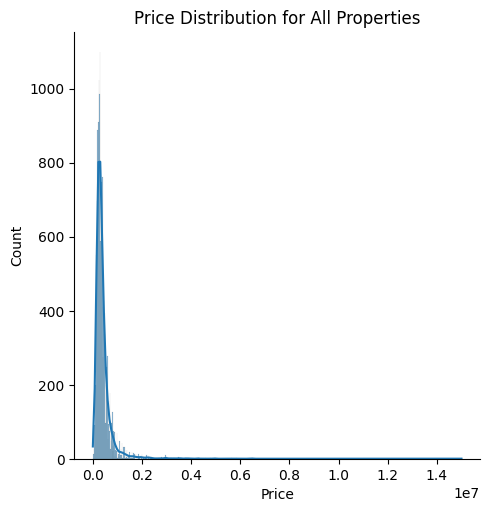

In [18]:
sns.displot(df['price'], binwidth=20000, kde=True)

plt.title('Price Distribution for All Properties')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

We can see that the dataset is highly skewed to the right as it contains outliers with very high prices.

We should remove them using the 1.5 IQR (interquartile range) as it is effective for dealing with skewed distributions.

In [19]:

IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)

upper_limit = df['price'].quantile(0.75) + 1.5 * IQR
lower_limit = df['price'].quantile(0.25) - 1.5 * IQR

no_outlier_df = df[(df['price'] < upper_limit) & (df['price'] > lower_limit)]



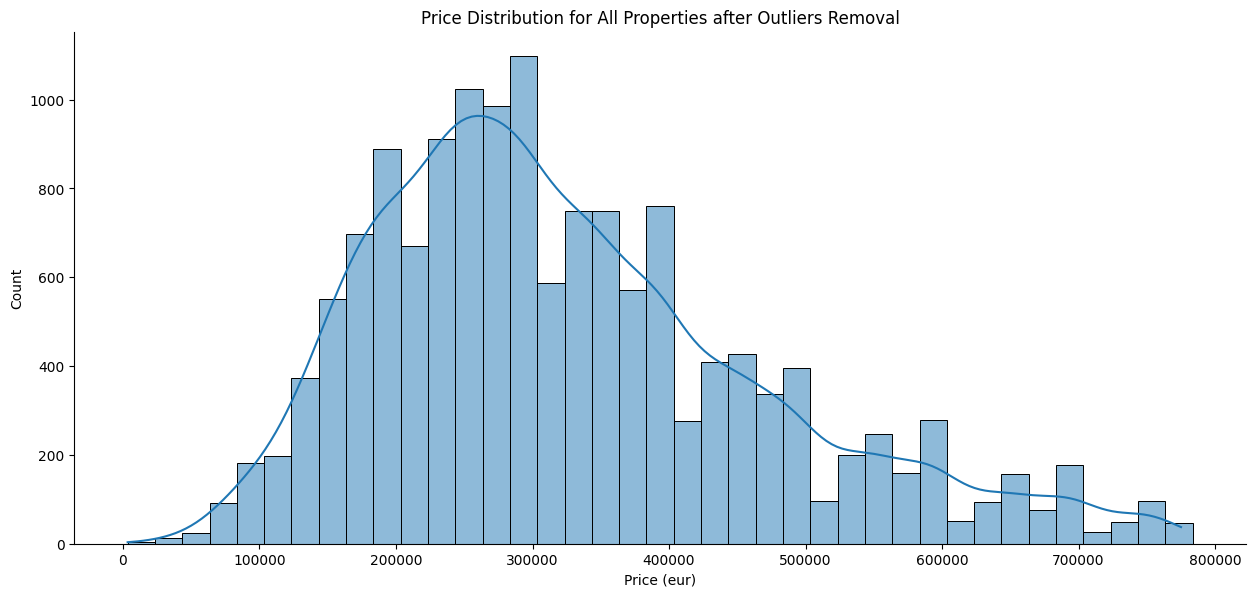

In [32]:
no_outlier_distplot = sns.displot(no_outlier_df['price'], binwidth=20000, kde=True)
no_outlier_distplot.fig.set_size_inches(15,6)
plt.title('Price Distribution for All Properties after Outliers Removal')
plt.xlabel('Price (eur)')
plt.ylabel('Count')
plt.show()

After removing outliers, we observe a much more uniform distribution.

## Price Distribution by Region and Property Type

Now let's visualise the distribution for each `region` by property `type` using a violinplot.

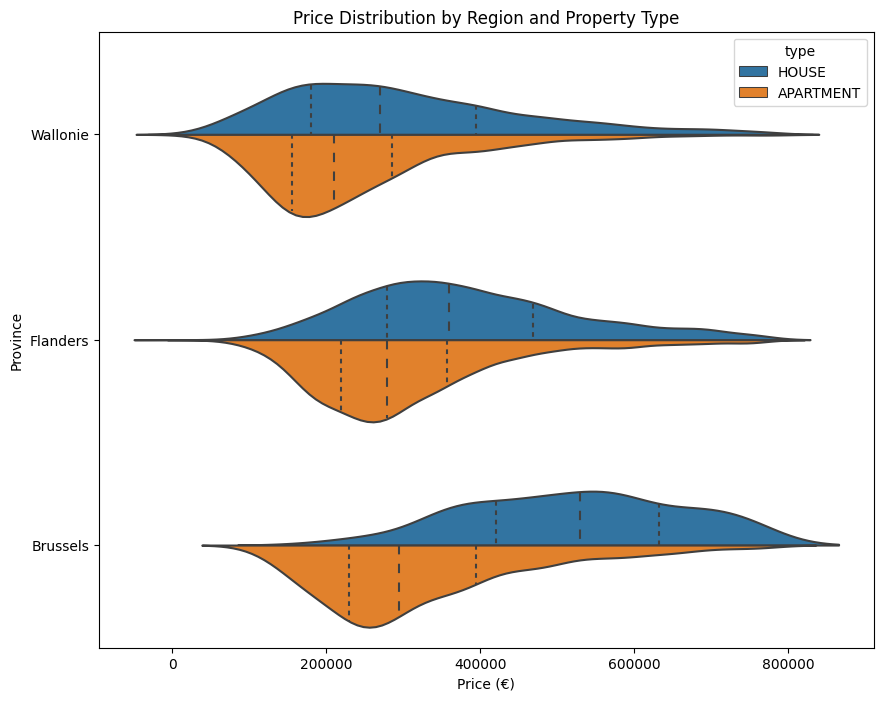

In [30]:
order = sorted(no_outlier_df['region'].unique(), reverse=True)

plt.figure(figsize=(10,8))
sns.violinplot(x="price", y="region", hue="type", split=True, inner="quart", data=no_outlier_df, order=order)
plt.title('Price Distribution by Region and Property Type')
plt.xlabel('Price (€)')
plt.ylabel('Province')
plt.show()


We can see that apartments generally have a more narrow price distribution compared to houses, suggesting that apartment prices are more similar to each other than house prices.

Property prices in Brussels show a more varied distribution compared to the other regions with a wider range of prices. This could be due to a higher variability in property characteristics (like size, condition, location within the region, etc) within Brussels. 

## Geographical Distribution by Region

Now let's visualise the distribution accross Belgium using the geographical coordinates.

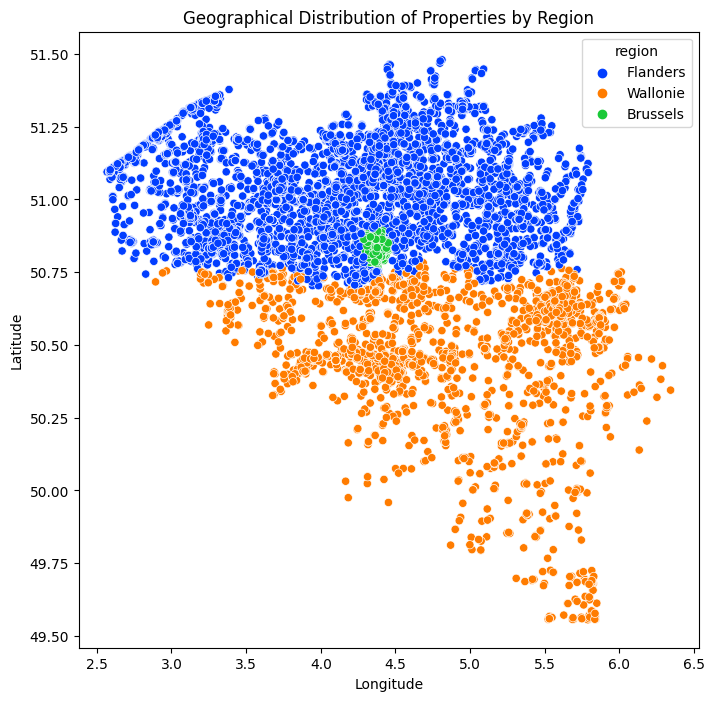

In [22]:
dropna_coord_df = df.dropna(subset=['latitude', 'longitude'])

plt.figure(figsize=(8, 8))
sns.scatterplot(x='longitude', y='latitude', hue='region', palette='bright', data=dropna_coord_df)
plt.title('Geographical Distribution of Properties by Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


We can observe a more dense concentration of points in the north which could be a reflection of a larger population density and also reveal a link between higher prices and real estate activity. This would need to be confirmed with additional data.

## Price Correlation

Now let's analyse the relationships between `price` and the other numerical variables to find the ones that are correlated.

We will use a heatmap to visualise the correlations.

In [23]:
list(df.select_dtypes(include='float'))


['price',
 'postalCode',
 'floor',
 'latitude',
 'longitude',
 'bedroomCount',
 'netHabitableSurface',
 'constructionYear',
 'facadeCount',
 'floorCount',
 'gardenSurface',
 'terraceSurface',
 'land',
 'bathroomCount',
 'toiletCount',
 'parkingCountIndoor',
 'primaryEnergyConsumptionPerSqm',
 'bookmarkCount',
 'viewCount']

In [24]:
heatmap_cols = ['price',
    'netHabitableSurface',
    'floor',
    'bedroomCount',
    'constructionYear',
    'facadeCount',
    'floorCount',
    'gardenSurface',
    'terraceSurface',
    'land',
    'latitude',
    'bathroomCount',
    'toiletCount',
    'parkingCountIndoor',
    'primaryEnergyConsumptionPerSqm',
    'viewCount']

In [25]:
correlation_matrix = df[heatmap_cols].corr().round(2)
correlation_matrix.sort_values(by='price', ascending=False).head()

,price,netHabitableSurface,floor,bedroomCount,constructionYear,facadeCount,floorCount,gardenSurface,terraceSurface,land,latitude,bathroomCount,toiletCount,parkingCountIndoor,primaryEnergyConsumptionPerSqm,viewCount
price,1.00,0.52,0.01,0.39,0.03,0.17,0.08,0.22,0.06,0.18,0.16,0.53,0.46,0.00,-0.02,-0.01
bathroomCount,0.53,0.44,-0.00,0.58,-0.08,0.09,0.03,0.10,0.04,0.08,-0.05,1.00,0.60,0.01,0.01,-0.00
netHabitableSurface,0.52,1.00,0.00,0.48,-0.16,0.22,-0.03,0.20,0.04,0.11,-0.06,0.44,0.52,-0.00,0.01,0.03
toiletCount,0.46,0.52,0.01,0.61,-0.13,0.16,-0.01,0.17,0.03,0.06,-0.09,0.60,1.00,0.00,0.00,0.04
bedroomCount,0.39,0.48,0.00,1.00,-0.18,0.23,-0.05,0.14,0.05,0.09,-0.11,0.58,0.61,0.00,0.03,0.09


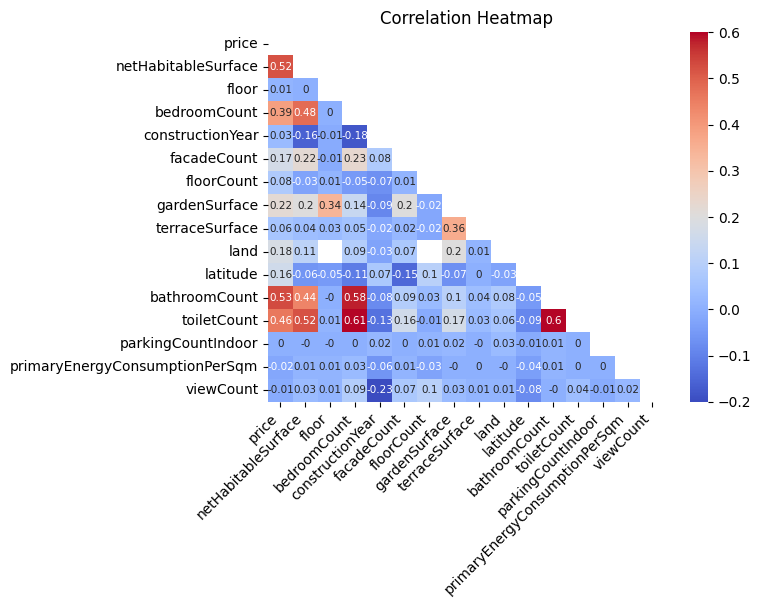

In [26]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

correlation_heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, annot_kws={"size":7.5},vmin=-0.2, vmax=0.6)
correlation_heatmap.set_xticklabels(correlation_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
correlation_heatmap.set(title='Correlation Heatmap')
plt.show()

Let's isolate the `price` correlations from this heatmap.

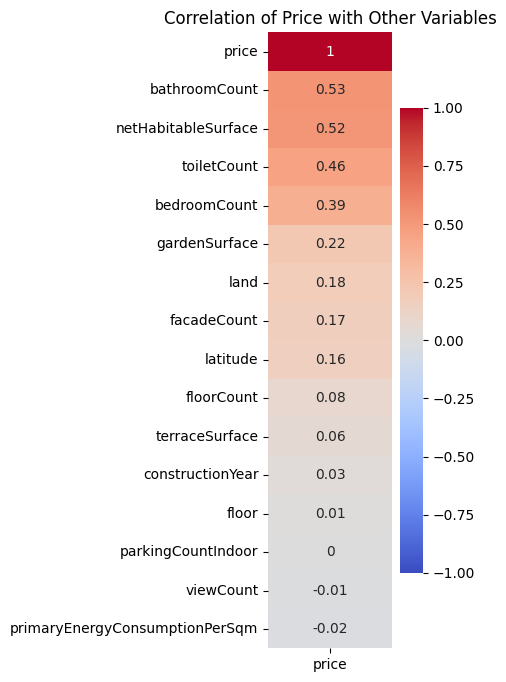

In [27]:
price_corr = correlation_matrix['price'].sort_values(ascending=False)

df_corr_price = pd.DataFrame(price_corr)

plt.figure(figsize=(2, 8))
sns.heatmap(df_corr_price, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation of Price with Other Variables')
plt.show()

We see that `price` tend to increase with `bathroom count`, `habitable surface`, `toilet count` and `bedroom count`. However `bathroom count`, `toilet count` and `bedroom count` are also correlated with `habitable surface` which would makes sense since the bigger the property the more rooms it has.

## Conclusion

The main conclusion that we can derive from this analysis is that `price` is mainly driven by `location` and `habitable surface` which is consistent with common expectations.